## 線形回帰

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
import seaborn as sns
import matplotlib.pyplot as plt

### データの読み込み

In [2]:
df_consume = pd.read_excel("measurements2.xlsx")

In [3]:
# データ確認
display(df_consume.head())
df_consume.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [4]:
#欠損値０埋め
df_consume = df_consume.fillna(0)

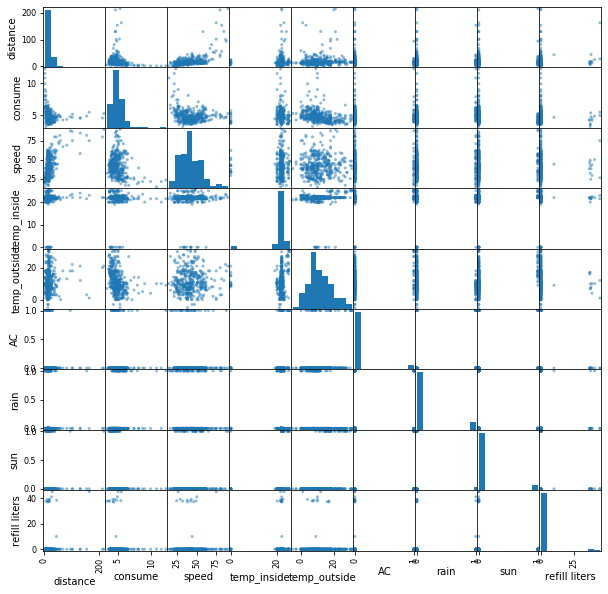

In [5]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_consume, figsize=(10,10))
plt.show()

In [6]:
# 相関係数を確認
df_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120,0.107045
consume,-0.128967,1.000000,-0.227866,0.027015,-0.320811,0.096591,0.248118,-0.170667,-0.074095
speed,0.562299,-0.227866,1.000000,0.026817,0.015411,-0.035408,0.009489,0.081618,-0.007446
temp_inside,0.053597,0.027015,0.026817,1.000000,0.077181,0.125307,0.011845,0.060782,0.025983
temp_outside,0.088175,-0.320811,0.015411,0.077181,1.000000,0.167562,-0.186315,0.346903,-0.041595
AC,-0.025738,0.096591,-0.035408,0.125307,0.167562,1.000000,0.242915,0.088598,-0.052571
rain,-0.019791,0.248118,0.009489,0.011845,-0.186315,0.242915,1.000000,-0.112650,0.033505
sun,0.081120,-0.170667,0.081618,0.060782,0.346903,0.088598,-0.112650,1.000000,-0.054448
refill liters,0.107045,-0.074095,-0.007446,0.025983,-0.041595,-0.052571,0.033505,-0.054448,1.000000


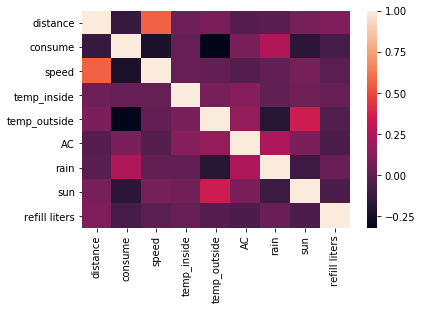

In [7]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_consume.corr())
plt.show()

・distanceとspeedの相関が高い　→　speedを用いる
・temp_outsideとsunの相関が高い → temp_outsideを用いる

In [8]:
# 係数を求める
y = df_consume["consume"].values
X = df_consume[['speed', 'temp_inside', 'temp_outside', 'AC', 'rain']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]

In [9]:
x１ = df_consume['speed'].values
x2 = df_consume['temp_inside'].values
x3 = df_consume['temp_outside'].values
x4 = df_consume['AC'].values
x5 = df_consume['rain'].values

# 重みと二乗誤差の確認
y_pred = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5
squared_error = 0.5 * np.sum((y - y_pred) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.800, w1 = -0.017, w2 = 0.011, w3 = -0.045, w4 = 0.359, w5 = 0.534
二乗誤差 = 165.066


In [10]:
# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.851
MAE = 0.618
RMSE = 0.922


## E10とSP98で分けてみる

In [11]:
# E10のデータ
df_consume_E10 = df_consume.query('gas_type == "E10"')
df_consume_SP98 = df_consume.query('gas_type == "SP98"')

In [13]:
# 係数を求める
y_E10 = df_consume_E10["consume"].values
X_E10 = df_consume_E10[['speed', 'temp_inside', 'temp_outside', 'AC', 'rain']].values
regr_E10 = LinearRegression(fit_intercept=True)
regr_E10.fit(X_E10, y_E10)

# 重みを取り出す
w0_E10 = regr_E10.intercept_
w1_E10 = regr_E10.coef_[0]
w2_E10 = regr_E10.coef_[1]
w3_E10 = regr_E10.coef_[2]
w4_E10 = regr_E10.coef_[3]
w5_E10 = regr_E10.coef_[4]

# 係数を求める
y_SP98 = df_consume_SP98["consume"].values
X_SP98 = df_consume_SP98[['speed', 'temp_inside', 'temp_outside', 'AC', 'rain']].values
regr_SP98 = LinearRegression(fit_intercept=True)
regr_SP98.fit(X_SP98, y_SP98)

# 重みを取り出す
w0_SP98 = regr_SP98.intercept_
w1_SP98 = regr_SP98.coef_[0]
w2_SP98 = regr_SP98.coef_[1]
w3_SP98 = regr_SP98.coef_[2]
w4_SP98 = regr_SP98.coef_[3]
w5_SP98 = regr_SP98.coef_[4]

In [14]:
x１_E10 = df_consume_E10['speed'].values
x2_E10 = df_consume_E10['temp_inside'].values
x3_E10 = df_consume_E10['temp_outside'].values
x4_E10 = df_consume_E10['AC'].values
x5_E10 = df_consume_E10['rain'].values

# 重みと二乗誤差の確認
y_pred_E10 = w0_E10 + w1_E10 * x1_E10 + w2_E10 * x2_E10 + w3_E10 * x3_E10 + w4_E10 * x4_E10 + w5_E10 * x5_E10
squared_error_E10 = 0.5 * np.sum((y_E10 - y_pred_E10) ** 2)
print('w0_E10 = {:.3f}, w1_E10 = {:.3f}, w2_E10 = {:.3f}, w3_E10 = {:.3f}, w4_E10 = {:.3f}, w5_E10 = {:.3f}'.format(w0_E10, w1_E10, w2_E10, w3_E10, w4_E10, w5_E10))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0_E10 = 5.012, w1_E10 = -0.014, w2_E10 = 0.039, w3_E10 = -0.040, w4_E10 = -0.001, w5_E10 = 0.637
二乗誤差 = 165.066


In [15]:
x１_SP98 = df_consume_SP98['speed'].values
x2_SP98 = df_consume_SP98['temp_inside'].values
x3_SP98 = df_consume_SP98['temp_outside'].values
x4_SP98 = df_consume_SP98['AC'].values
x5_SP98 = df_consume_SP98['rain'].values

# 重みと二乗誤差の確認
y_pred_SP98 = w0_SP98 + w1_SP98 * x1_SP98 + w2_SP98 * x2_SP98 + w3_SP98 * x3_SP98 + w4_SP98 * x4_SP98 + w5_SP98 * x5_SP98
squared_error_SP98 = 0.5 * np.sum((y_SP98 - y_pred_SP98) ** 2)
print('w0_SP98 = {:.3f}, w1_SP98 = {:.3f}, w2_SP98 = {:.3f}, w3_SP98 = {:.3f}, w4_SP98 = {:.3f}, w5_SP98 = {:.3f}'.format(w0_SP98, w1_SP98, w2_SP98, w3_SP98, w4_SP98, w5_SP98))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0_SP98 = 6.118, w1_SP98 = -0.019, w2_SP98 = 0.002, w3_SP98 = -0.048, w4_SP98 = 0.475, w5_SP98 = 0.489
二乗誤差 = 165.066
